# 데이터 불러오기

In [146]:
import pandas as pd

#데이터 불러오기
df = pd.read_csv("diabetes.csv")

# 데이터 탐색 및 분석

## 데이터 상위 5개 행 확인

In [147]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 각 Feature의 의미

- **Pregnancies**: 임신 횟수
- **Glucose**: 혈당 수치
- **BloodPressure**: 혈압 측정값
- **SkinThickness**: 피부 두께
- **Insulin**: 혈액 내 인슐린 수치
- **BMI**: 체질량지수
- **DiabetesPedigreeFunction**: 당뇨병 확률
- **Age**: 나이
- **Outcome**: 최종 결과 (1은 "예", 0은 "아니오"를 의미함)

## 데이터 사이즈 확인

In [148]:
df.shape

(768, 9)

## Null 데이터 및 데이터 타입 확인

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [150]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 중복 데이터 확인

In [151]:
df.loc[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## 데이터 통계 확인

In [152]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Outcome 컬럼을 기준으로 다른 컬럼들과의 상관관계 분석

In [153]:
df.corr(numeric_only=True)['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

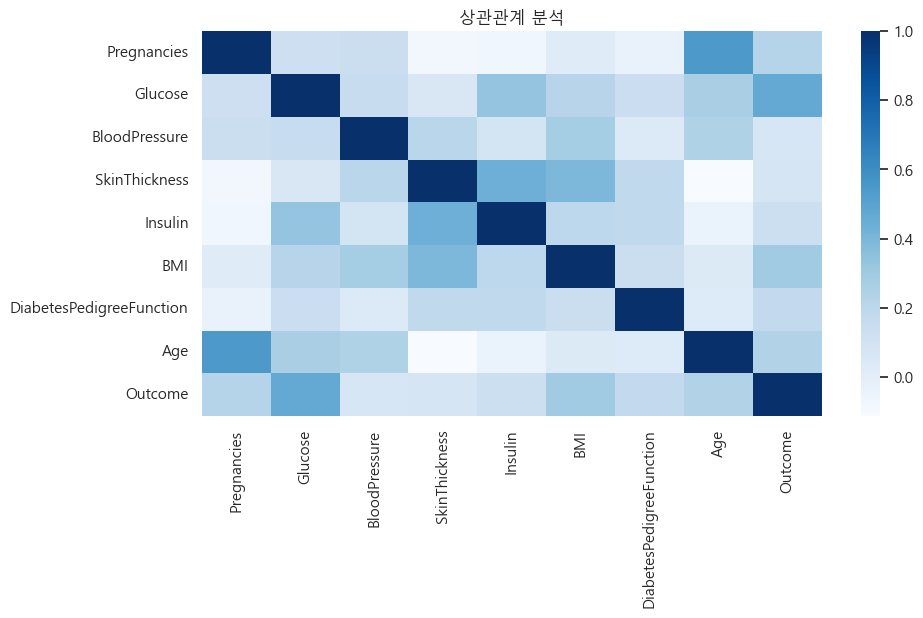

In [154]:
# heatmap을 통한 시각화

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize': (10, 5)}, style='white', font='Malgun Gothic')


sns.heatmap(data=df.corr(numeric_only=True), cmap='Blues')
plt.title('상관관계 분석')
plt.show()

## 각 컬럼들의 특이값 분석

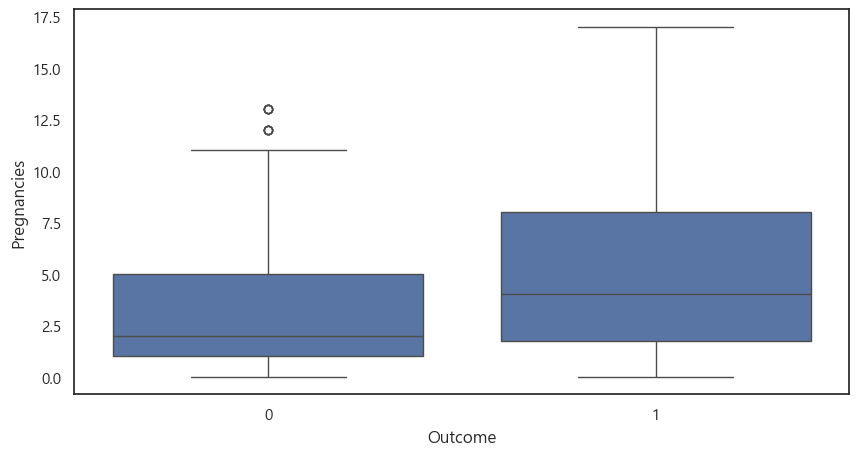

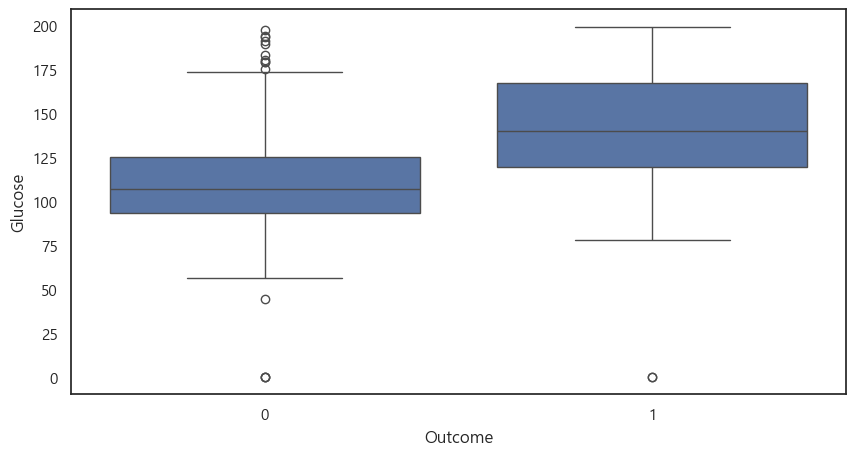

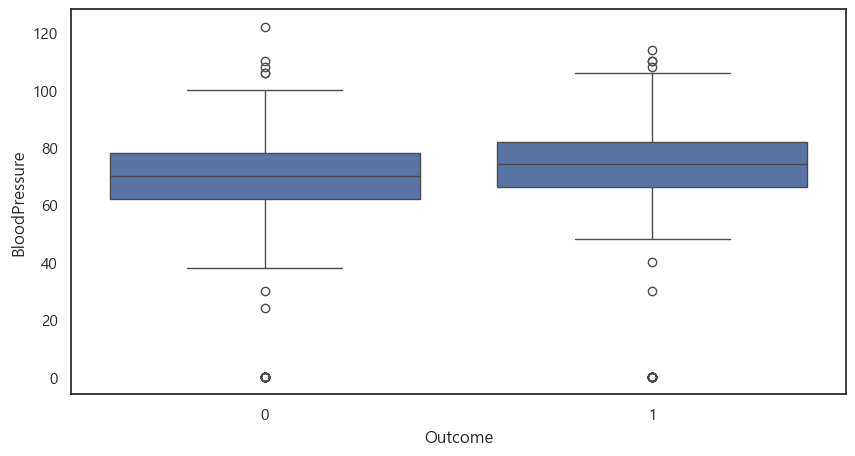

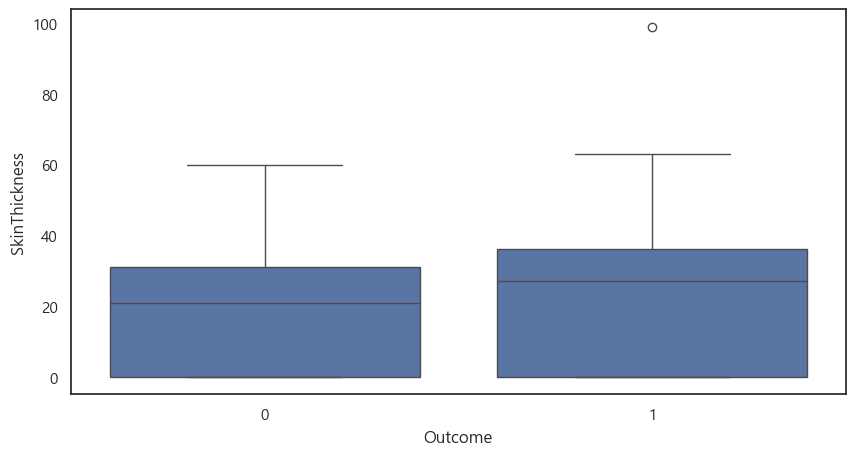

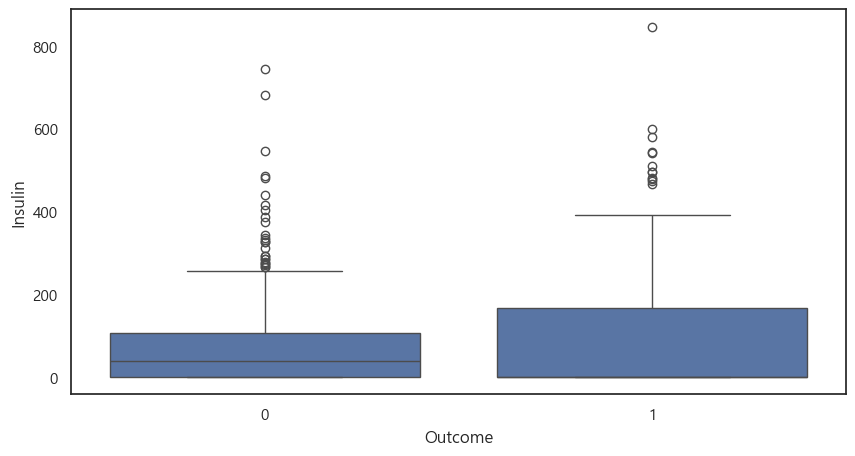

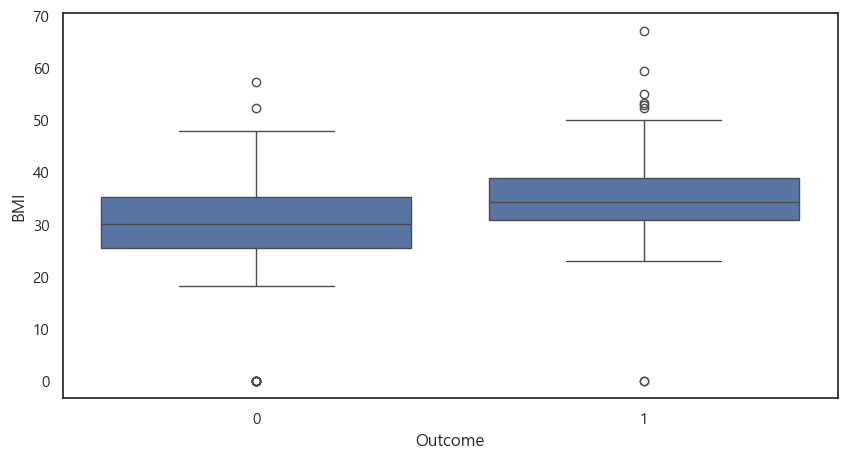

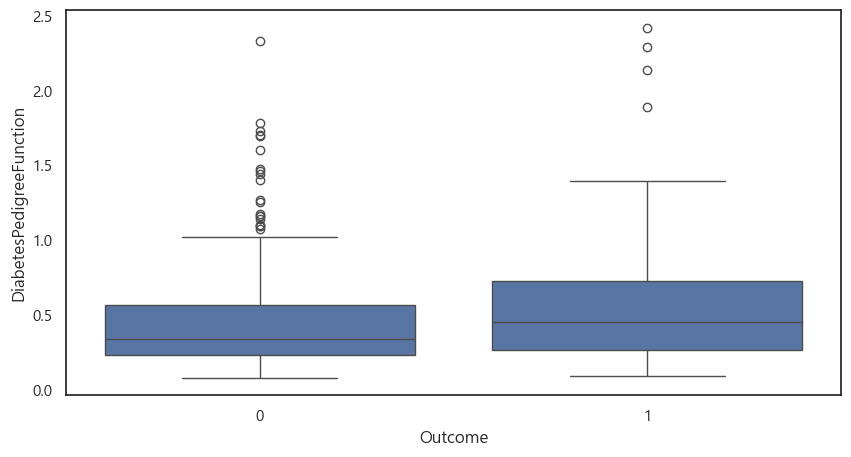

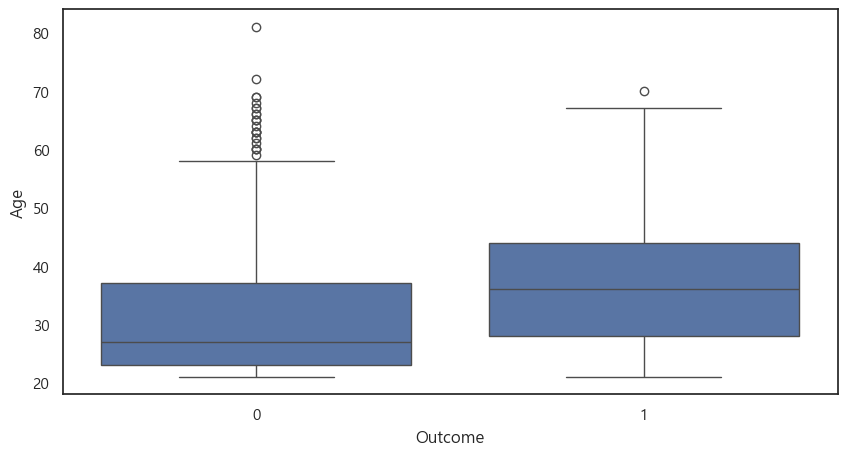

In [155]:
#박스 플롯을 활용한 데이터 분석
box_cols = [x for x in df.columns if x != 'Outcome']

for col in box_cols:
    sns.boxplot(data=df, x='Outcome', y=col)
    plt.show()

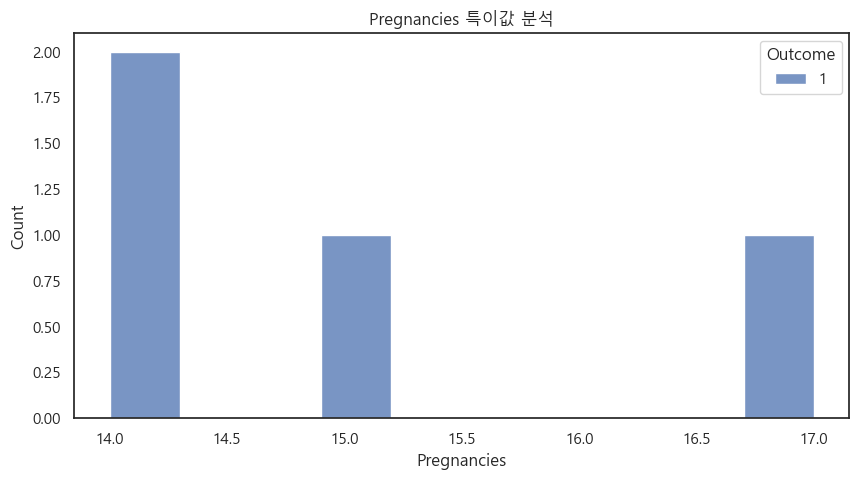

C:\machine_learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


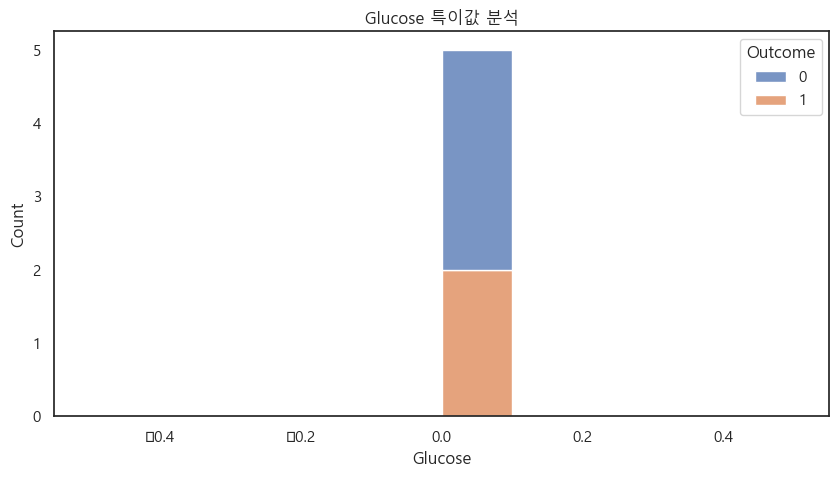

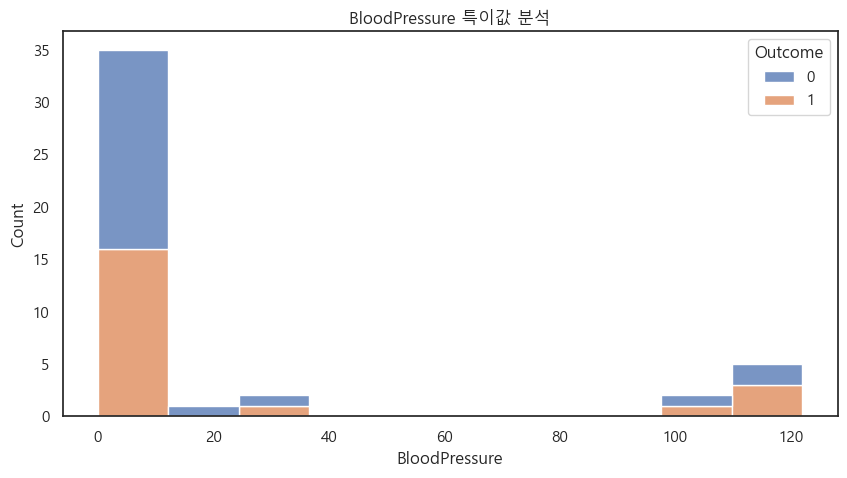

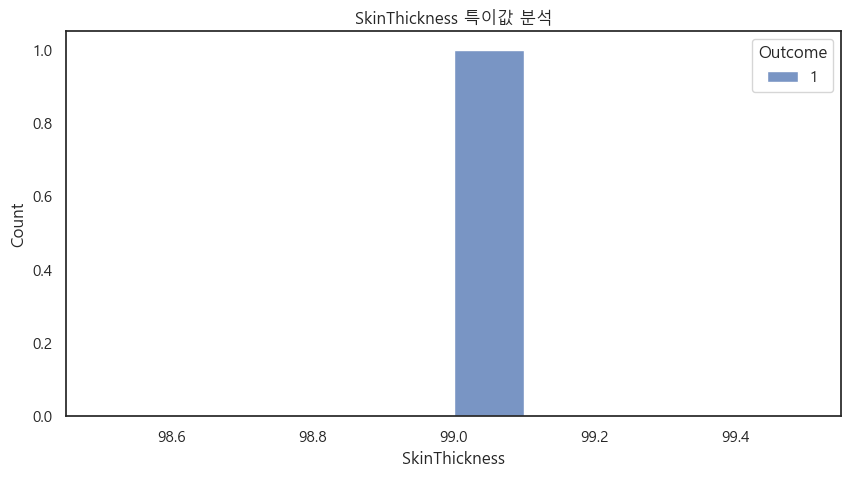

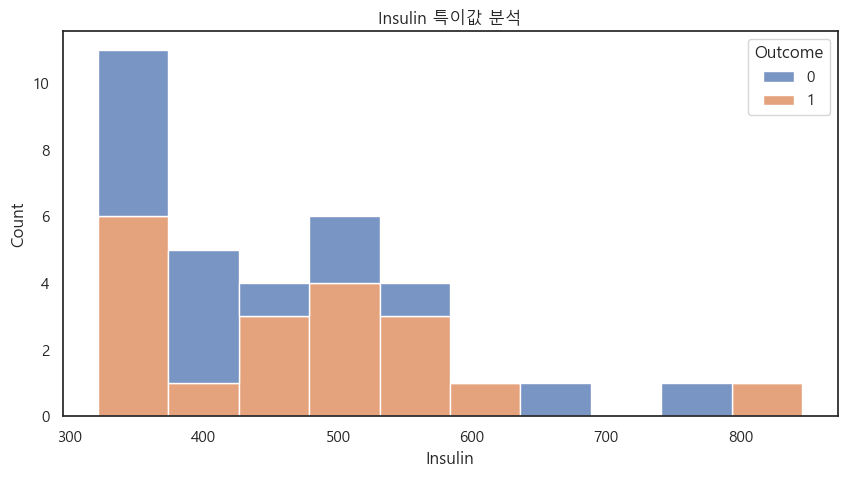

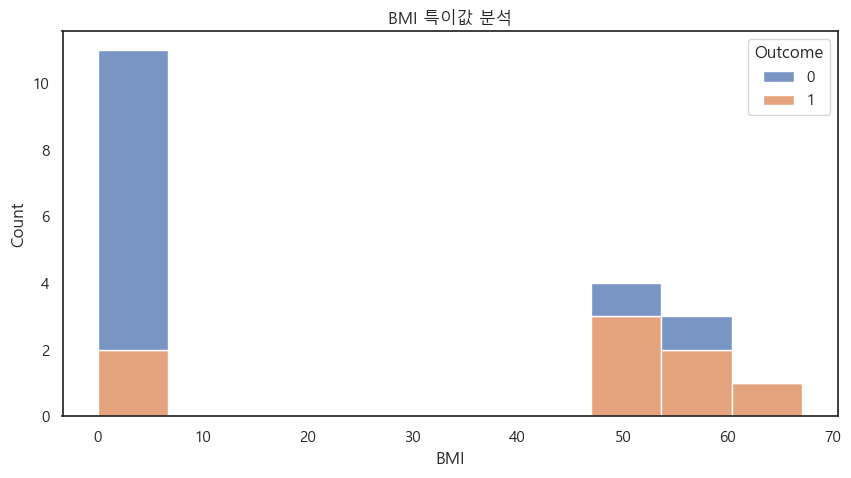

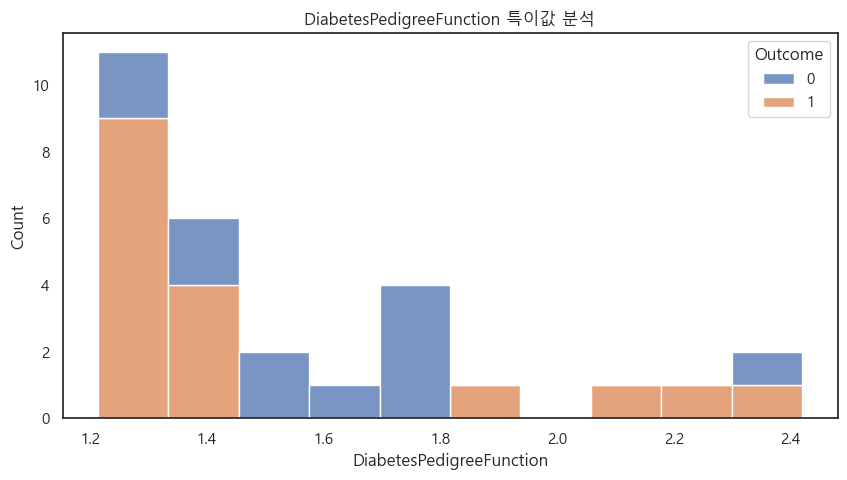

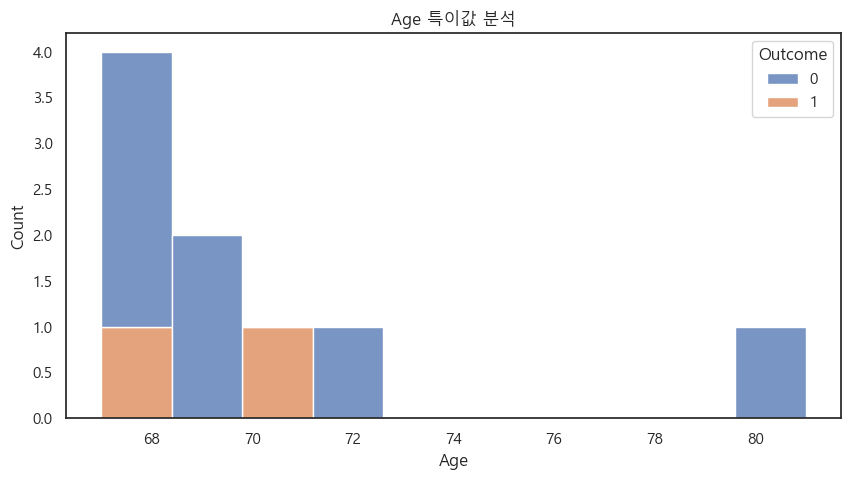

In [156]:
# 특이값만 포함하는 데이터 분석

def return_outlier_dataframe(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    Lower_bound = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR
    
    mask = (df[column_name] < Lower_bound) | (df[column_name] > Upper_bound)
    filtered_df = df.loc[mask, [column_name, 'Outcome']]
    
    return filtered_df

hist_cols = [x for x in df.columns if x != 'Outcome']

for col in hist_cols:
    filtered_df = return_outlier_dataframe(df, col)
    sns.histplot(data=filtered_df, x=col, hue='Outcome', multiple='stack', bins=10)
    plt.title(f"{col} 특이값 분석")
    plt.show()

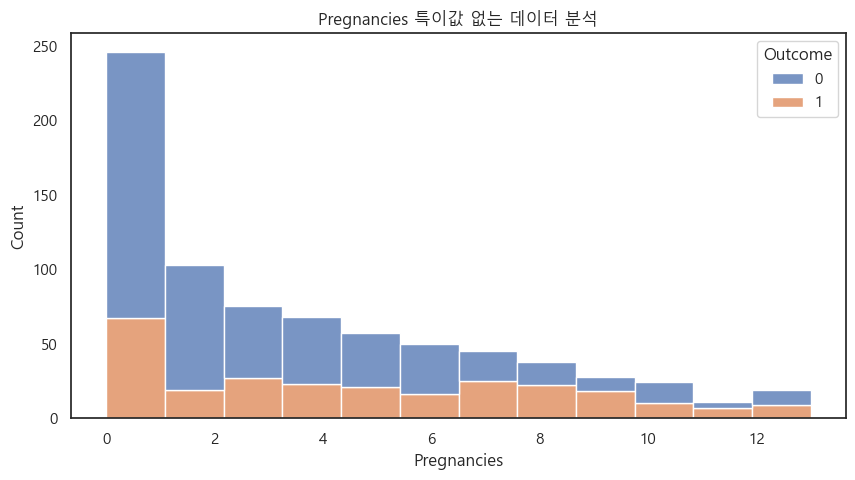

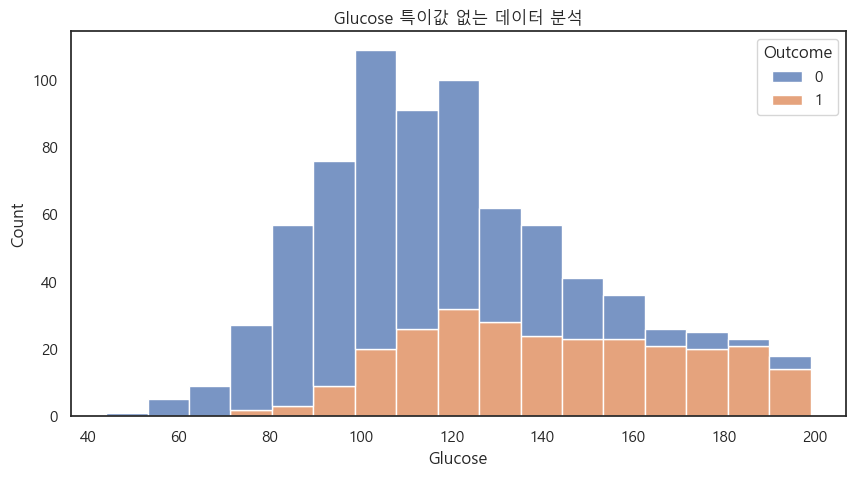

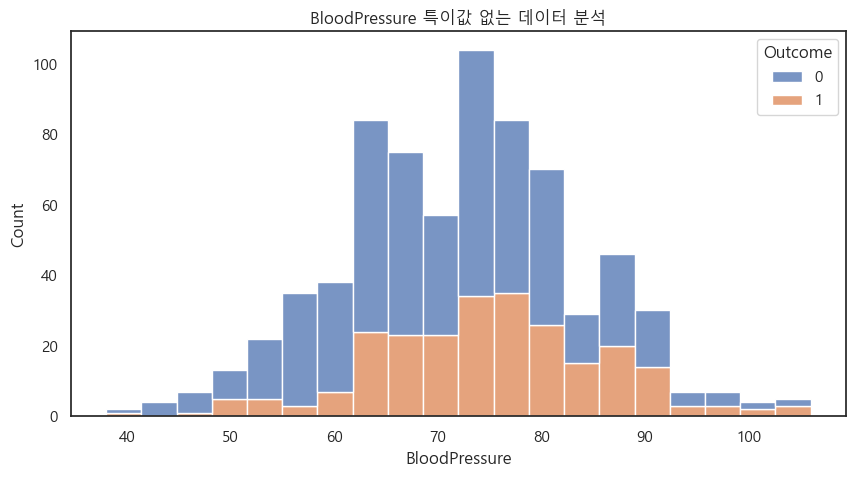

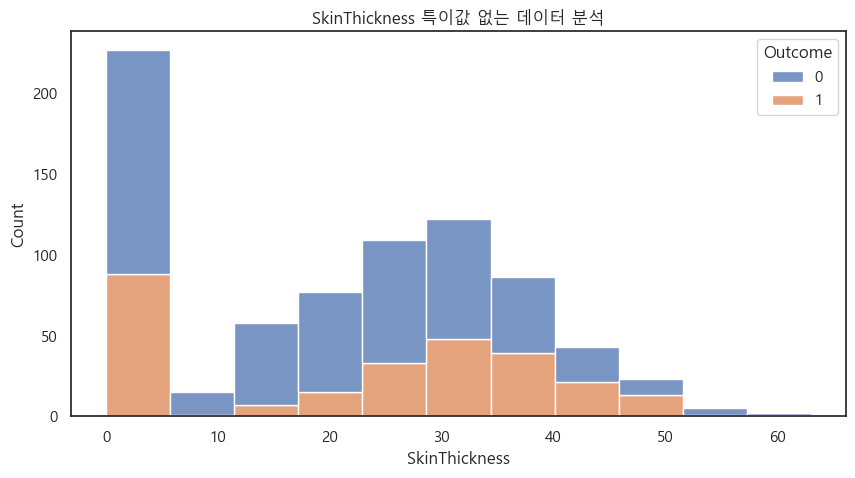

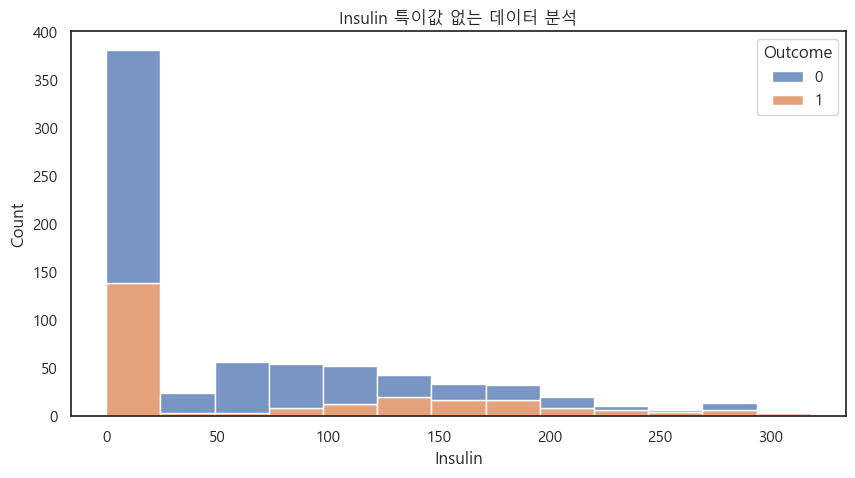

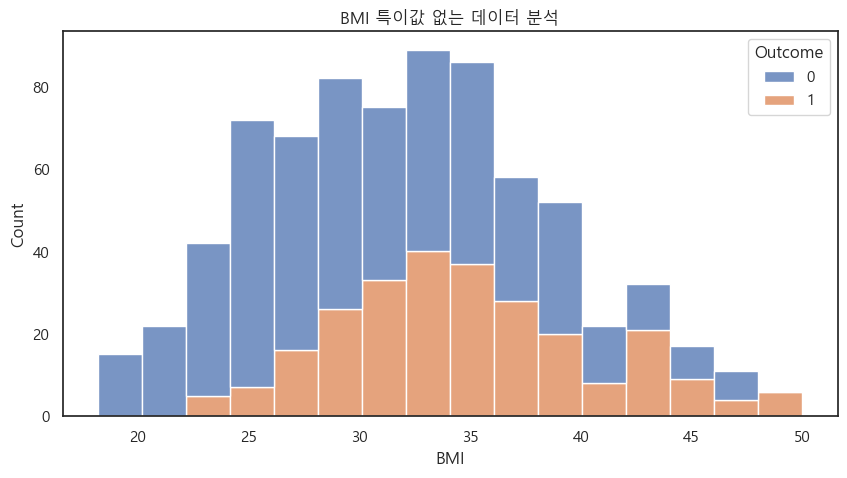

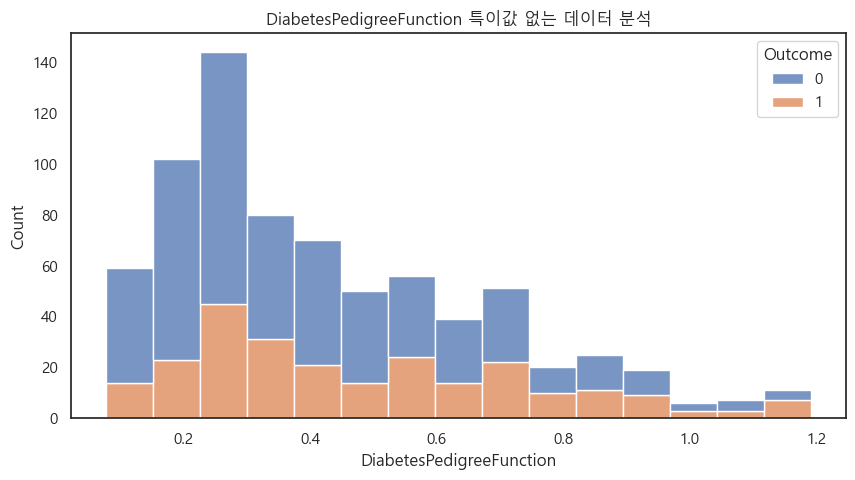

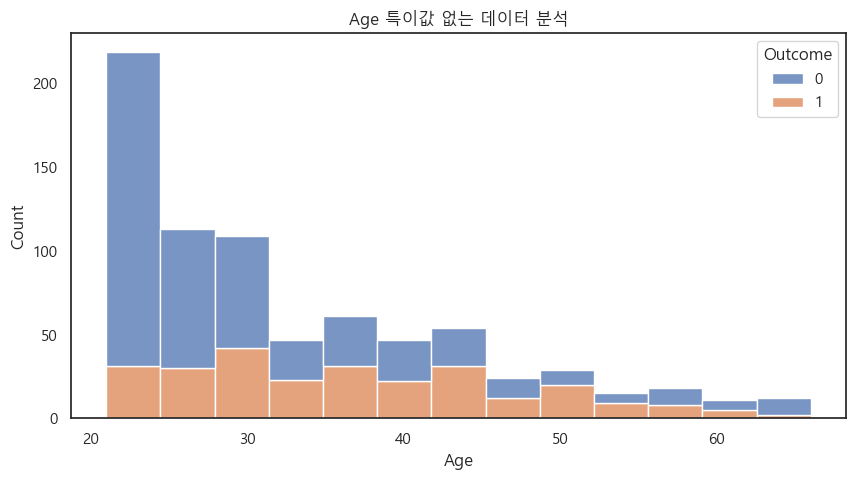

In [157]:
#특이값을 포함하지 않는 데이터 분석

def return_non_outlier_dataframe(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    Lower_bound = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR

    mask = (df[column_name] <= Upper_bound) & (df[column_name] >= Lower_bound)
    filtered_df = df.loc[mask, [column_name, 'Outcome']]

    return filtered_df

for col in hist_cols:
    filtered_df = return_non_outlier_dataframe(df, col)
    sns.histplot(data=filtered_df, x=col, hue='Outcome', multiple='stack')
    plt.title(f"{col} 특이값 없는 데이터 분석")
    plt.show()

In [158]:
#특이값 데이터가 유의미한지 통계적으로 검정

from scipy.stats import ttest_ind

static_cols = [x for x in df.columns if x != 'Outcome']

# t-검정
for col in static_cols:
    outliers_df = return_outlier_dataframe(df, col)
    non_outliers_df = return_non_outlier_dataframe(df, col)
    t_stat, p_value = ttest_ind(outliers_df['Outcome'], non_outliers_df['Outcome'])
    print(f"{col} T-test p-value: {p_value}\n")


Pregnancies T-test p-value: 0.006121777620388334

Glucose T-test p-value: 0.8104476216883586

BloodPressure T-test p-value: 0.08796450884067732

SkinThickness T-test p-value: 0.17213026474084697

Insulin T-test p-value: 0.00859393575061175

BMI T-test p-value: 0.5050119791187517

DiabetesPedigreeFunction T-test p-value: 0.00624226190831264

Age T-test p-value: 0.42298134688577405



C:\machine_learning\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## T-Test 결과 요약

특이값 데이터(Outliers)가 Outcome 변수에 유의미한 영향을 미치는지 검정한 결과 분석

### 유의미한 결과 (p-value < 0.05)
- **Pregnancies**: p-value = **0.0061**  
  → 특이값 데이터가 Outcome에 유의미한 영향을 미침.
- **Insulin**: p-value = **0.0086**  
  → 특이값 데이터가 Outcome에 유의미한 영향을 미침.
- **DiabetesPedigreeFunction**: p-value = **0.0062**  
  → 특이값 데이터가 Outcome에 유의미한 영향을 미침.

### 유의미하지 않은 결과 (p-value ≥ 0.05)
- **Glucose**: p-value = 0.8104  
- **BloodPressure**: p-value = 0.0880  
- **SkinThickness**: p-value = 0.1721  
- **BMI**: p-value = 0.5050  
- **Age**: p-value = 0.4230  

---

### 요약
특이값 데이터 중 **Pregnancies**, **Insulin**, **DiabetesPedigreeFunction** 변수는 Outcome 변수에 유의미한 영향을 미친다고 판단됨. 나머지 변수는 유의미하지 않은 것으로 보임.

In [159]:
# 특이값 데이터 중 Outcome 변수에 유의미한 영향을 미치지 않는 데이터 값을 해당 컬럼의 중앙값으로 대체

def replace_outliers_with_median(df, replace_cols):
    for col in replace_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - 1.5 * IQR
        Upper_bound = Q3 + 1.5 * IQR

        mask = (df[col] < Lower_bound) | (df[col] > Upper_bound)
        df.loc[mask, col] = df[col].median()
    
    return df

replace_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age']
df_copy = df.copy()
replace_df = replace_outliers_with_median(df_copy, replace_cols)

print("특이값 대체 확인 - 표준 편차 비교\n")
print("원본 데이터 표준 편차\n")
print(f"{df.std()}\n")
print("특이값 대체 데이터 표준편차\n")
print(f"{replace_df.std()}")

특이값 대체 확인 - 표준 편차 비교

원본 데이터 표준 편차

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

특이값 대체 데이터 표준편차

Pregnancies                   3.369578
Glucose                      30.438286
BloodPressure                11.146723
SkinThickness                15.698554
Insulin                     115.244002
BMI                           6.410558
DiabetesPedigreeFunction      0.331329
Age                          11.055385
Outcome                       0.476951
dtype: float64


## 데이터 범주화

In [160]:
# 각 컬럼의 데이터를 범주화 한 뒤, 중앙값으로 대체

category_cols = [x for x in df.columns if x != 'Outcome']

for col in category_cols:
    #구간 설정
    bins = 10
    categories, bin_edges = pd.cut(df[col], bins=bins, retbins=True)

    #중앙값으로 컬럼 값 설정
    median_labels = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
    df[col] = pd.cut(df[col], bins=bin_edges, labels=median_labels)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.9500,149.25,67.1,34.6500,41.877,36.905,0.663500,48.00,1
1,0.8415,89.55,67.1,24.7500,41.877,23.485,0.429300,30.00,0
2,7.6500,189.05,67.1,4.9005,41.877,23.485,0.663500,30.00,1
3,0.8415,89.55,67.1,24.7500,126.900,30.195,0.193929,23.97,0
4,0.8415,129.35,42.7,34.6500,126.900,43.615,2.302900,30.00,1


## 데이터 스케일링(표준화 적용)

데이터 분포를 평균 0, 표준편차 1로 변환하기 때문에 **이상치**가 모델 성능에 미치는 영향을 줄이고,  
경사 하강법(Gradient Descent)을 사용하는 모델에서는 빠르고 안정적인 최적화를 도울 수 있음

In [161]:
from sklearn.preprocessing import StandardScaler

# 표준화 적용 (Outcome 제외)
features = df.drop(columns='Outcome')
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 스케일링된 데이터를 다시 데이터프레임으로 변환
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['Outcome'] = df['Outcome']

# 결과 확인
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.615818,0.885242,-0.134650,0.861566,-0.561070,0.627505,0.582393,1.298021,1
1,-0.957656,-0.989345,-0.134650,0.175995,-0.561070,-1.078253,-0.120222,-0.290497,0
2,1.139437,2.134967,-0.134650,-1.198576,-0.561070,-1.078253,0.582393,-0.290497,1
3,-0.957656,-0.989345,-0.134650,0.175995,0.263163,-0.225374,-0.826350,-0.822651,0
4,-0.957656,0.260380,-1.428705,0.861566,0.263163,1.480383,5.500696,-0.290497,1


## 원핫 인코딩

In [162]:
from sklearn.preprocessing import OneHotEncoder

# Outcome 컬럼 제외한 데이터프레임 생성
df_onehot = df_scaled.drop(columns='Outcome')

# Outcome 값만 따로 저장
df_target = df_scaled[['Outcome']]

# 원핫 인코딩 대상 컬럼 정의
onehot_cols = [x for x in df_scaled.columns if x != 'Outcome']

# 원핫 인코딩 수행
df_onehot = pd.get_dummies(df_onehot, columns=onehot_cols)

## 데이터 분할

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_onehot, df_target, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print(f"X_train: {X_train.head()}")
print(f"X_test: {X_test.head()}")
print(f"y_train: {y_train.head()}")
print(f"y_test: {y_test.head()}")

X_train:      Pregnancies_-0.9576563562534358  Pregnancies_-0.431419548875835  \
60                             False                            True   
618                            False                           False   
346                             True                           False   
294                             True                           False   
231                            False                           False   

     Pregnancies_0.09219916493272313  Pregnancies_0.615817878741281  \
60                             False                          False   
618                            False                          False   
346                            False                          False   
294                            False                          False   
231                            False                           True   

     Pregnancies_1.1394365925498393  Pregnancies_1.6630553063583973  \
60                            False                         

AttributeError: 'numpy.ndarray' object has no attribute 'head'

# 트리 관련 모델 디폴트 테스트

In [164]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# 모델 정의
random_model = RandomForestClassifier()
extra_model = ExtraTreesClassifier()
gbm_model = GradientBoostingClassifier()

# KFold 정의
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# 모델 테스트 함수
def model_test(model):
    model = model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')
    return np.mean(score) * 100

# 모델 성능 비교
tree_models = [random_model, extra_model, gbm_model]

for model in tree_models:
    result = model_test(model)
    print(f"{type(model).__name__} 성능: {result:.2f}%")

RandomForestClassifier 성능: 73.94%
ExtraTreesClassifier 성능: 73.44%
GradientBoostingClassifier 성능: 74.93%


# 트리 관련 모델 중요도 측정

In [165]:
# 모델별 특성 중요도 출력
for model in tree_models:
    print(f"\n{model.__class__.__name__}:")
    try:
        # 특성 중요도 출력
        importances = model.feature_importances_
        print(f"Feature Importances: {importances}")
        # 최대 중요도 특성과 값 출력
        max_importance = np.max(importances)
        max_feature_idx = np.argmax(importances)
        print(f"Max Importance: {max_importance:.4f} (Feature Index: {max_feature_idx})")
    except AttributeError as e:
        # feature_importances_ 속성이 없는 경우
        print("Feature importances not available.")
        print(f"Error: {e}")


RandomForestClassifier:
Feature Importances: [2.48278136e-02 1.98493168e-02 2.20217035e-02 1.31842883e-02
 2.03858999e-02 1.43716393e-02 3.01331023e-03 6.68279417e-03
 2.15857990e-03 1.84069432e-04 1.23853546e-03 9.98667922e-04
 1.14730034e-02 4.55655266e-02 2.97171526e-02 2.53632601e-02
 2.06100115e-02 4.57598141e-02 4.07715561e-02 1.06280142e-02
 7.79423070e-06 1.78878023e-03 2.06886265e-03 1.53968189e-02
 2.79459114e-02 2.86515970e-02 1.59998765e-02 5.10795146e-03
 1.24804446e-03 2.05552012e-02 1.44124694e-02 2.16101399e-02
 2.34969847e-02 1.59576791e-02 9.15903738e-04 1.76386787e-03
 0.00000000e+00 2.42086873e-02 1.98317821e-02 1.68355514e-02
 5.32535906e-03 1.10357816e-03 2.97101716e-03 4.36807068e-03
 5.51507864e-04 2.04681269e-03 5.45798972e-05 1.46328846e-03
 1.02744036e-03 3.53340350e-02 2.55538125e-02 2.59680244e-02
 1.65475760e-02 6.41653449e-03 2.48528058e-03 1.39418715e-03
 2.94482106e-02 2.13689179e-02 1.89642027e-02 9.56626016e-03
 8.64489544e-03 7.46894022e-03 1.221687

In [166]:
# 각 모델의 중요도를 데이터프레임으로 변환
random_model_importance = pd.DataFrame({'Feature': X_train.columns, 'random_model': random_model.feature_importances_})
extra_model_importance = pd.DataFrame({'Feature': X_train.columns, 'extra_model': extra_model.feature_importances_})
gbm_model_importance = pd.DataFrame({'Feature': X_train.columns, 'gbm_model': gbm_model.feature_importances_})

# 각 데이터프레임을 순차적으로 병합
importances = pd.merge(random_model_importance, extra_model_importance, on='Feature')
importances = pd.merge(importances, gbm_model_importance, on='Feature')

# 숫자형 컬럼 선택 후 평균 계산
numeric_columns = [col for col in importances.columns if col != 'Feature']
importances['avg'] = importances[numeric_columns].mean(axis=1)

# 최종 데이터프레임 구성
importances = importances[['Feature', 'avg']].sort_values(by='avg', ascending=False)
importances

,Feature,avg
66,Age_-0.8226510132426373,0.080867
17,Glucose_1.5101044864972804,0.072647
13,Glucose_-0.9893451343427652,0.064171
18,Glucose_2.134966891707293,0.058459
49,BMI_-1.0782532231022761,0.050993
...,...,...
75,Age_3.9455505853627364,0.000152
9,Pregnancies_3.757530161592629,0.000134
62,DiabetesPedigreeFunction_3.3928518382029025,0.000084
20,BloodPressure_-2.722760880629865,0.000003


In [167]:
#중요도가 높은 feature만 선택
importances = importances[:60]

In [168]:
train_importance = X_train[list(importances['Feature'])]
test_importance = X_test[list(importances['Feature'])]

In [169]:
train_importance.head()

,Age_-0.8226510132426373,Glucose_1.5101044864972804,Glucose_-0.9893451343427652,Glucose_2.134966891707293,BMI_-1.0782532231022761,DiabetesPedigreeFunction_-0.8263500205891647,Glucose_-0.3644827291327539,BloodPressure_0.51237771184302,SkinThickness_0.17599459988386235,BMI_-0.22537435216463447,...,Age_3.4160445777441497,Pregnancies_3.2339114477840716,BMI_3.186141131585931,BloodPressure_-2.075733162135288,Pregnancies_2.1866740201669557,BMI_4.039020002523572,Insulin_3.5436961134765292,DiabetesPedigreeFunction_4.095466635670357,SkinThickness_2.9182806734971405,BloodPressure_-1.428705443640711
60,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
618,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
346,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
294,False,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# 중요도가 높은 feature로 다시 머신러닝 적용

In [170]:
# 모델 테스트 함수
def model_test(model):
    model = model.fit(train_importance, y_train)
    score = cross_val_score(model, train_importance, y_train, cv=k_fold, scoring='accuracy')
    return np.mean(score) * 100

# 모델 성능 비교
tree_models = [random_model, extra_model, gbm_model]

for model in tree_models:
    result = model_test(model)
    print(f"{type(model).__name__} 성능: {result:.2f}%")


RandomForestClassifier 성능: 73.94%
ExtraTreesClassifier 성능: 72.47%
GradientBoostingClassifier 성능: 76.06%


# 하이퍼파라미터 튜닝(RandomizedSearchCV 및 GridSearchCV 탐색)

In [171]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.stats import randint

#데이터 준비(y_train, y_test는 이전에 정리한 데이터 사용)
X_train = train_importance
X_test = test_importance

# 교차 검증 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [172]:
# Random Forest 모델
rf_model = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 범위 정의
rf_param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Randomized Search 실행
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_distributions,
    n_iter=50,  # 시도할 조합 개수
    cv=cv,  # 교차 검증
    scoring='accuracy',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# 모델 훈련
rf_random_search.fit(X_train, y_train)

print("Best parameters:", rf_random_search.best_params_)
print("Best accuracy:", rf_random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 319}
Best accuracy: 0.750806344129015


In [173]:
# Extra Trees 모델
et_model = ExtraTreesClassifier(random_state=42)

# 하이퍼파라미터 범위 정의
et_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Grid Search 실행
et_grid_search = GridSearchCV(
    estimator=et_model,
    param_grid=et_param_grid,
    cv=cv,  # 교차 검증
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# 모델 훈련
et_grid_search.fit(X_train, y_train)

print("Best parameters:", et_grid_search.best_params_)
print("Best accuracy:", et_grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best accuracy: 0.7524590163934426


In [174]:
# Gradient Boosting 모델
gb_model = GradientBoostingClassifier(random_state=42)

# 하이퍼파라미터 범위 정의
gb_param_distributions = {
    'n_estimators': randint(100, 500),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Randomized Search 실행
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_distributions,
    n_iter=50,  # 시도할 조합 개수
    cv=cv,  # 교차 검증
    scoring='accuracy',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# 모델 훈련
gb_random_search.fit(X_train, y_train)

print("Best parameters:", gb_random_search.best_params_)
print("Best accuracy:", gb_random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 171, 'subsample': 0.6}
Best accuracy: 0.7540983606557378


In [175]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 최적 모델 성능 평가
print("\n최적 모델 성능 평가")
rf_best_model = rf_random_search.best_estimator_
et_best_model = et_grid_search.best_estimator_
gbm_best_model = gb_random_search.best_estimator_

# Random Forest 성능
rf_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test))
rf_precision = precision_score(y_test, rf_best_model.predict(X_test), average='weighted')
rf_recall = recall_score(y_test, rf_best_model.predict(X_test), average='weighted')
rf_f1 = f1_score(y_test, rf_best_model.predict(X_test), average='weighted')

# Extra Trees 성능
et_accuracy = accuracy_score(y_test, et_best_model.predict(X_test))
et_precision = precision_score(y_test, et_best_model.predict(X_test), average='weighted')
et_recall = recall_score(y_test, et_best_model.predict(X_test), average='weighted')
et_f1 = f1_score(y_test, et_best_model.predict(X_test), average='weighted')

# Gradient Boosting 성능
gbm_accuracy = accuracy_score(y_test, gbm_best_model.predict(X_test))
gbm_precision = precision_score(y_test, gbm_best_model.predict(X_test), average='weighted')
gbm_recall = recall_score(y_test, gbm_best_model.predict(X_test), average='weighted')
gbm_f1 = f1_score(y_test, gbm_best_model.predict(X_test), average='weighted')

# 성능 출력
print("\nRandom Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

print("\nExtra Trees Performance:")
print(f"Accuracy: {et_accuracy:.4f}")
print(f"Precision: {et_precision:.4f}")
print(f"Recall: {et_recall:.4f}")
print(f"F1-Score: {et_f1:.4f}")

print("\nGradient Boosting Performance:")
print(f"Accuracy: {gbm_accuracy:.4f}")
print(f"Precision: {gbm_precision:.4f}")
print(f"Recall: {gbm_recall:.4f}")
print(f"F1-Score: {gbm_f1:.4f}")


최적 모델 성능 평가

Random Forest Performance:
Accuracy: 0.7857
Precision: 0.7835
Recall: 0.7857
F1-Score: 0.7843

Extra Trees Performance:
Accuracy: 0.7922
Precision: 0.7888
Recall: 0.7922
F1-Score: 0.7868

Gradient Boosting Performance:
Accuracy: 0.7208
Precision: 0.7197
Recall: 0.7208
F1-Score: 0.7202


## 모델 성능 요약

### 랜덤 포레스트 (Random Forest)
- **정확도 (Accuracy)**: 0.7857
- **정밀도 (Precision)**: 0.7835
- **재현율 (Recall)**: 0.7857
- **F1-점수 (F1-Score)**: 0.7843

### 엑스트라 트리 (Extra Trees)
- **정확도 (Accuracy)**: 0.7922
- **정밀도 (Precision)**: 0.7888
- **재현율 (Recall)**: 0.7922
- **F1-점수 (F1-Score)**: 0.7868

### 그라디언트 부스팅 (Gradient Boosting)
- **정확도 (Accuracy)**: 0.7208
- **정밀도 (Precision)**: 0.7197
- **재현율 (Recall)**: 0.7208
- **F1-점수 (F1-Score)**: 0.7202

---

### 요약
엑스트라 트리 (Extra Trees) 모델은 정확도(0.7922), 정밀도(0.7888), 재현율(0.7922), F1-점수(0.7868) 등 모든 지표에서 가장 높은 성능을 보여 최적의 모델로 보임. 랜덤 포레스트는 엑스트라 트리에 근접한 성능을 보였으며, 그라디언트 부스팅은 상대적으로 낮은 성능을 기록함. 
결과적으로 엑스트라 트리 모델은 효율성과 정확성 모두에서 우수한 모델임.

# Voting(Hard, Soft)

In [176]:
from sklearn.ensemble import VotingClassifier

# 최적화된 모델 준비
rf_best_model = rf_random_search.best_estimator_  # RandomForest 최적 모델
et_best_model = et_grid_search.best_estimator_  # ExtraTrees 최적 모델
gbm_best_model = gb_random_search.best_estimator_  # GradientBoosting 최적 모델

In [177]:
# Hard Voting
print("Hard Voting 시작")
voting_clf_hard = VotingClassifier(
    estimators=[
        ('RandomForest', rf_best_model),
        ('ExtraTrees', et_best_model),
        ('GradientBoosting', gbm_best_model)
    ],
    voting='hard'  # Hard Voting: 다수결 방식
)

voting_clf_hard.fit(X_train, y_train)  
hard_predictions = voting_clf_hard.predict(X_test)  
hard_accuracy = accuracy_score(y_test, hard_predictions) 

print(f"Hard Voting Classifier Accuracy: {hard_accuracy:.4f}")


Hard Voting 시작
Hard Voting Classifier Accuracy: 0.7987


In [178]:
# Soft Voting
print("\nSoft Voting 시작")
voting_clf_soft = VotingClassifier(
    estimators=[
        ('RandomForest', rf_best_model),
        ('ExtraTrees', et_best_model),
        ('GradientBoosting', gbm_best_model)
    ],
    voting='soft'  # Soft Voting: 확률 평균 방식
)

voting_clf_soft.fit(X_train, y_train)  
soft_predictions = voting_clf_soft.predict(X_test)  
soft_accuracy = accuracy_score(y_test, soft_predictions) 

print(f"Soft Voting Classifier Accuracy: {soft_accuracy:.4f}")


Soft Voting 시작
Soft Voting Classifier Accuracy: 0.7532


In [179]:
# Hard Voting & Soft Voting 성능 평가
print("\nHard Voting & Soft Voting 성능 평가")
hard_accuracy = accuracy_score(y_test, hard_predictions)
soft_accuracy = accuracy_score(y_test, soft_predictions)

hard_precision = precision_score(y_test, hard_predictions, average='weighted')
soft_precision = precision_score(y_test, soft_predictions, average='weighted')

hard_recall = recall_score(y_test, hard_predictions, average='weighted')
soft_recall = recall_score(y_test, soft_predictions, average='weighted')

hard_f1 = f1_score(y_test, hard_predictions, average='weighted')
soft_f1 = f1_score(y_test, soft_predictions, average='weighted')

print("\nVoting 비교:")
print(f"Hard Voting - Accuracy: {hard_accuracy:.4f}, Precision: {hard_precision:.4f}, Recall: {hard_recall:.4f}, F1-Score: {hard_f1:.4f}")
print(f"Soft Voting - Accuracy: {soft_accuracy:.4f}, Precision: {soft_precision:.4f}, Recall: {soft_recall:.4f}, F1-Score: {soft_f1:.4f}")



Hard Voting & Soft Voting 성능 평가

Voting 비교:
Hard Voting - Accuracy: 0.7987, Precision: 0.7955, Recall: 0.7987, F1-Score: 0.7953
Soft Voting - Accuracy: 0.7532, Precision: 0.7514, Recall: 0.7532, F1-Score: 0.7522


## Voting 성능 요약

### Hard Voting
- **정확도 (Accuracy)**: 0.7987
- **정밀도 (Precision)**: 0.7955
- **재현율 (Recall)**: 0.7987
- **F1-점수 (F1-Score)**: 0.7953

### Soft Voting
- **정확도 (Accuracy)**: 0.7532
- **정밀도 (Precision)**: 0.7514
- **재현율 (Recall)**: 0.7532
- **F1-점수 (F1-Score)**: 0.7522

---

### 요약
Hard Voting은 정확도(0.7987), 정밀도(0.7955), 재현율(0.7987), F1-점수(0.7953) 모든 지표에서 Soft Voting을 뛰어넘는 성능을 보임. 
이는 Hard Voting 방식이 개별 모델의 결과를 다수결로 결합함으로써 더 강력한 예측 성능을 보였음을 나타냄. 
반면 Soft Voting은 개별 모델의 확률 값 평균을 사용하는 방식으로, 모델 간 확률 분포의 차이가 클 경우 성능이 저하될 수 있음. 
결과적으로, Hard Voting은 보다 일관되고 안정적인 예측 결과를 제공하며, 현재 데이터에 가장 적합한 앙상블 방법으로 평가됨.